In [1]:
import pandas as pd

In [2]:
# title 중복된값 제거

In [3]:
df_title = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [4]:
df_title = df_title[['title', 'id']]

In [5]:
df_title = df_title.drop_duplicates()

In [6]:
# rating 필요한 컬럼만 가공

In [7]:
df_rating = pd.read_csv('data/ratings.csv')

In [8]:
df_rating

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [9]:
df_rating = df_rating.iloc[ : , :2+1]

In [10]:
# merge 하기 위해 데이터 똑같이 맞춤

In [11]:
df_title = df_title.rename(columns={'id':'movieId'})

In [12]:
df_title

,title,movieId
0,Toy Story,862
1,Jumanji,8844
2,Grumpier Old Men,15602
3,Waiting to Exhale,31357
4,Father of the Bride Part II,11862
...,...,...
45461,Subdue,439050
45462,Century of Birthing,111109
45463,Betrayal,67758
45464,Satan Triumphant,227506


In [13]:
df_title = df_title.dropna()

In [14]:
df_title['movieId'] = df_title['movieId'].astype(int)

C:\Users\-\AppData\Local\Temp/ipykernel_11992/3391263016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title['movieId'] = df_title['movieId'].astype(int)


In [15]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    45430 non-null  object
 1   movieId  45430 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 887.3+ KB


In [16]:
# 데이터 합치기

In [95]:
df = pd.merge(df_title, df_rating, on='movieId')

In [18]:
df

,title,movieId,userId,rating
0,Toy Story,862,1923,3.0
1,Toy Story,862,2103,5.0
2,Toy Story,862,5380,1.0
3,Toy Story,862,6177,4.0
4,Toy Story,862,6525,4.0
...,...,...,...,...
11436563,Century of Birthing,111109,33940,2.5
11436564,Century of Birthing,111109,172224,3.0
11436565,Century of Birthing,111109,210792,3.0
11436566,Century of Birthing,111109,225396,3.5


In [19]:
# rating 의 count 의 분포를 분석

In [20]:
df['title'].nunique()

7409

In [21]:
df.groupby('title')['rating'].count().describe()

count     7409.000000
mean      1543.604805
std       5404.904779
min          1.000000
25%          7.000000
50%         45.000000
75%        485.000000
max      91082.000000
Name: rating, dtype: float64

<AxesSubplot:>

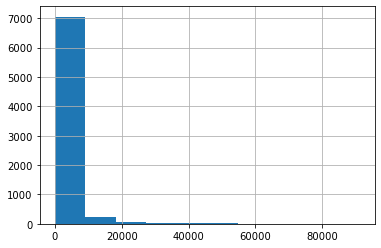

In [22]:
df.groupby('title')['rating'].count().to_frame()['rating'].hist()

In [23]:
# mean count 구하고 별점 높은 영화중 count 를 조절하여 자르자

In [24]:
ratings_df_mean = df.groupby('title')['rating'].mean()

In [25]:
ratings_df_count = df.groupby('title')['rating'].count()

In [26]:
ratings_df_mean = ratings_df_mean.to_frame()

In [27]:
ratings_df_mean.columns = ['mean']

In [28]:
ratings_df_count = ratings_df_count.to_frame()

In [29]:
ratings_df_count.columns = ['count']

In [96]:
ratings_mean_count_df = ratings_df_mean.join(ratings_df_count)

In [31]:
ratings_mean_count_df

,mean,count
title,,
!Women Art Revolution,2.802945,883
"$1,000 on the Black",3.000000,1
$5 a Day,2.246795,156
'Gator Bait,3.443590,195
'R Xmas,2.627907,86
...,...,...
Ödipussi,3.458498,253
Şaban Oğlu Şaban,3.764228,123
Škola princů,3.750000,2


In [32]:
ratings_mean_count_df['count'].describe()

count     7409.000000
mean      1543.604805
std       5404.904779
min          1.000000
25%          7.000000
50%         45.000000
75%        485.000000
max      91082.000000
Name: count, dtype: float64

<AxesSubplot:>

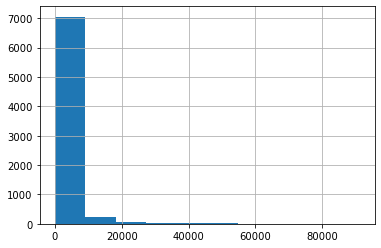

In [33]:
ratings_mean_count_df['count'].hist()

In [34]:
ratings_mean_count_df

,mean,count
title,,
!Women Art Revolution,2.802945,883
"$1,000 on the Black",3.000000,1
$5 a Day,2.246795,156
'Gator Bait,3.443590,195
'R Xmas,2.627907,86
...,...,...
Ödipussi,3.458498,253
Şaban Oğlu Şaban,3.764228,123
Škola princů,3.750000,2


In [97]:
ratings_mean_count_df = \
ratings_mean_count_df.loc[(ratings_mean_count_df['mean'] > 3) &
                          (ratings_mean_count_df['count'] > 5000) &
                          (ratings_mean_count_df['count'] < 12000), ]

In [83]:
ratings_mean_count_df

,mean,count
title,,
28 Days Later,3.216995,9438
300,3.726079,10357
7 Virgins,3.339387,6002
8 Women,3.634179,5679
88 Minutes,3.208466,10335
...,...,...
Yankee Doodle Dandy,3.461006,6283
Young Adam,3.219454,6744
Young Frankenstein,3.682266,5780


In [84]:
# 데이터 자른것의 영화만 df에서 가져오기

In [98]:
ratings_mean_count_df = ratings_mean_count_df.reset_index()

In [99]:
ratings_mean_count_df

,title,mean,count
0,28 Days Later,3.216995,9438
1,300,3.726079,10357
2,7 Virgins,3.339387,6002
3,8 Women,3.634179,5679
4,88 Minutes,3.208466,10335
...,...,...,...
254,Yankee Doodle Dandy,3.461006,6283
255,Young Adam,3.219454,6744
256,Young Frankenstein,3.682266,5780
257,Zatoichi,4.004338,11412


In [92]:
df

,title,movieId,userId,rating
0,Toy Story,862,1923,3.0
1,Toy Story,862,2103,5.0
2,Toy Story,862,5380,1.0
3,Toy Story,862,6177,4.0
4,Toy Story,862,6525,4.0
...,...,...,...,...
11436563,Century of Birthing,111109,33940,2.5
11436564,Century of Birthing,111109,172224,3.0
11436565,Century of Birthing,111109,210792,3.0
11436566,Century of Birthing,111109,225396,3.5


In [100]:
df = df.set_index('title').loc[ ratings_mean_count_df['title'].unique() , ].reset_index()

In [101]:
df

,title,movieId,userId,rating
0,28 Days Later,170,8,3.0
1,28 Days Later,170,36,4.0
2,28 Days Later,170,68,3.0
3,28 Days Later,170,71,3.5
4,28 Days Later,170,193,3.0
...,...,...,...,...
2031586,xXx,7451,270752,4.0
2031587,xXx,7451,270757,4.5
2031588,xXx,7451,270763,2.5
2031589,xXx,7451,270807,4.5


In [ ]:
# df 피벗테이블 과 상관계수

In [102]:
df_pivot = df.pivot_table(values='rating', index='userId', columns= 'title', aggfunc='mean')

In [103]:
df_pivot

title,28 Days Later,300,7 Virgins,8 Women,88 Minutes,A Bridge Too Far,A Close Shave,A Kiss Before Dying,A Perfect Murder,A Tale of Two Cities,...,What's New Pussycat?,While You Were Sleeping,Willy Wonka & the Chocolate Factory,Wish You Were Here,Within the Woods,Yankee Doodle Dandy,Young Adam,Young Frankenstein,Zatoichi,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270893,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [104]:
df_corr = df_pivot.corr()

In [105]:
df_corr

title,28 Days Later,300,7 Virgins,8 Women,88 Minutes,A Bridge Too Far,A Close Shave,A Kiss Before Dying,A Perfect Murder,A Tale of Two Cities,...,What's New Pussycat?,While You Were Sleeping,Willy Wonka & the Chocolate Factory,Wish You Were Here,Within the Woods,Yankee Doodle Dandy,Young Adam,Young Frankenstein,Zatoichi,xXx
title,,,,,,,,,,,,,,,,,,,,,
28 Days Later,1.000000,0.189100,0.214053,0.110950,0.296684,0.014497,0.137849,0.341978,0.103624,0.339376,...,0.078391,0.080935,0.316099,0.156420,0.086543,0.210222,0.279453,0.203146,0.006954,0.186320
300,0.189100,1.000000,0.153035,0.393691,0.320768,0.118686,0.153659,0.130509,0.091131,0.200073,...,0.168064,0.188818,0.257048,0.261245,0.137678,0.195374,0.270513,0.281256,0.115508,0.173415
7 Virgins,0.214053,0.153035,1.000000,0.201602,0.180496,0.213251,0.229352,0.322558,0.211946,0.194455,...,0.154537,0.170352,0.187914,0.272589,0.191204,0.174086,0.182075,0.222384,0.121469,0.115104
8 Women,0.110950,0.393691,0.201602,1.000000,0.150919,0.180756,0.111424,0.194514,0.094293,0.178048,...,0.130355,0.198973,0.148738,0.178505,0.156882,0.143749,0.225076,0.258531,0.185540,0.214417
88 Minutes,0.296684,0.320768,0.180496,0.150919,1.000000,0.045695,0.094595,0.253203,0.061813,0.346692,...,0.069738,0.067352,0.393844,0.230593,0.042947,0.296615,0.354789,0.345558,-0.038943,0.243593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yankee Doodle Dandy,0.210222,0.195374,0.174086,0.143749,0.296615,0.086264,0.159409,0.194484,0.127682,0.224691,...,0.160776,0.091121,0.222833,0.218490,0.127338,1.000000,0.199108,0.265369,0.099752,0.197308
Young Adam,0.279453,0.270513,0.182075,0.225076,0.354789,0.083626,0.112623,0.236140,0.056565,0.430057,...,0.220426,0.079497,0.384634,0.290240,0.133239,0.199108,1.000000,0.324355,0.053825,0.177691
Young Frankenstein,0.203146,0.281256,0.222384,0.258531,0.345558,0.202837,0.135093,0.162884,0.158284,0.252163,...,0.313075,0.142830,0.278479,0.213465,0.239771,0.265369,0.324355,1.000000,0.244995,0.182261


In [106]:
df.to_csv('df.csv')
df_pivot.to_csv('df_pivot.csv')

In [168]:
df_corr.to_csv('df_corr.csv')

In [ ]:
############################################################

In [107]:
user_rating = pd.read_csv('data/user_rating.csv')

In [108]:
user_rating

,Unnamed: 0,title,rating,userId
0,0,28 Days Later,3.0,999
1,1,300,5.0,999


In [ ]:
# 내 영화 상관계수 하는 논리들

In [109]:
user_rating['title'][0]

'28 Days Later'

In [116]:
df_user_corr = df_corr[user_rating['title'][0]].sort_values(ascending= False).to_frame()

In [118]:
df_user_corr.columns = ['correlation']

In [119]:
df_user_corr

,correlation
title,
28 Days Later,1.000000
Guter Junge,0.409584
Hotel Very Welcome,0.391691
Short Circuit,0.386996
Kill Bill: Vol. 1,0.380783
...,...
Die Hard,-0.001874
Hannibal Rising,-0.015515
Voyage to the Bottom of the Sea,-0.017153


In [120]:
user_rating['rating'][0]

3.0

In [121]:
df_user_corr['weight'] = user_rating['rating'][0] * df_user_corr['correlation']

In [122]:
df_user_corr

,correlation,weight
title,,
28 Days Later,1.000000,3.000000
Guter Junge,0.409584,1.228752
Hotel Very Welcome,0.391691,1.175072
Short Circuit,0.386996,1.160988
Kill Bill: Vol. 1,0.380783,1.142349
...,...,...
Die Hard,-0.001874,-0.005622
Hannibal Rising,-0.015515,-0.046545
Voyage to the Bottom of the Sea,-0.017153,-0.051460


In [ ]:
############################################################

In [ ]:
# 내가 영화에 준 별점을 상관계수에 채우는 작업

In [127]:
user_rating

,Unnamed: 0,title,rating,userId
0,0,28 Days Later,3.0,999
1,1,300,5.0,999


In [128]:
similar_movies_list = pd.DataFrame()

for i in range( user_rating.shape[0] ) :
  movie_name = user_rating['title'][i]
  recom_movies = df_corr[movie_name].sort_values(ascending=False).to_frame()
  recom_movies.columns = ['correlation']
  recom_movies['weight'] = user_rating['rating'][i] * recom_movies['correlation']
  similar_movies_list = similar_movies_list.append( recom_movies )

In [ ]:
# 내 영화들 지우고 추천영화만 정렬해서 보여주는 작업

In [131]:
similar_movies_list = similar_movies_list.sort_values('weight' , ascending=False)
user_rating['title'].to_list()
similar_movies_list.drop( user_rating['title'].to_list() , axis=0,  inplace= True )

similar_movies_list.groupby('title')['weight'].max().sort_values(ascending = False).head(5)

In [156]:
similar_movies_list.groupby('title')['weight'].max().sort_values(ascending = False)

title
Forbidden Planet          2.039279
8 Women                   1.968456
Cat on a Hot Tin Roof     1.957806
Swept from the Sea        1.910789
To Catch a Thief          1.874142
                            ...   
The Remains of the Day    0.394813
Hannibal Rising           0.343158
Olga's House of Shame     0.315385
Dog Day Afternoon         0.209957
Closer                    0.058774
Name: weight, Length: 257, dtype: float64

In [161]:
my_movie = similar_movies_list.groupby('title')['weight'].max().sort_values(ascending = False).to_frame().reset_index()

In [167]:
my_movie.loc[ : , 'title' ].to_frame().head(5)

,title
0,Forbidden Planet
1,8 Women
2,Cat on a Hot Tin Roof
3,Swept from the Sea
4,To Catch a Thief
